In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



In [3]:
from sklearn.datasets import make_blobs

In [7]:
x,y = make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)

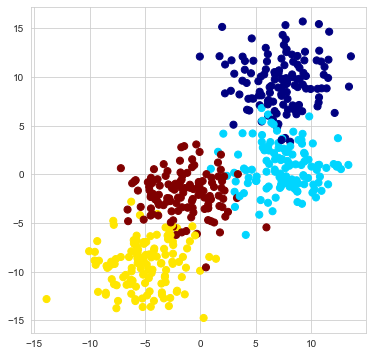

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='jet')

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())


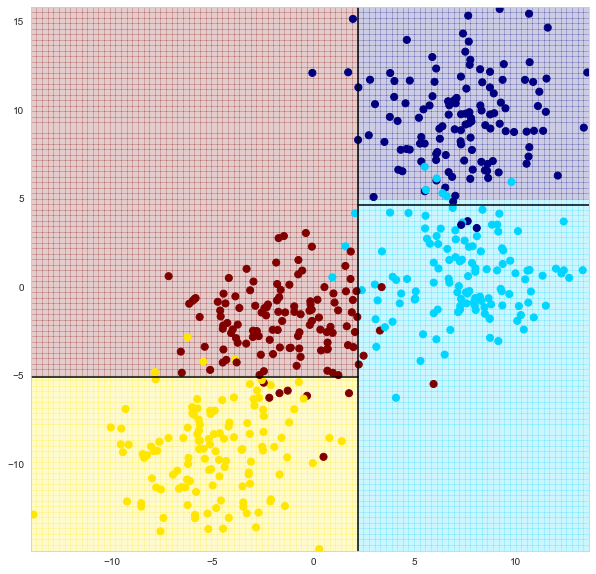

In [16]:
# Set model variable
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

# Show Boundaries
visualize_tree(clf,x,y)

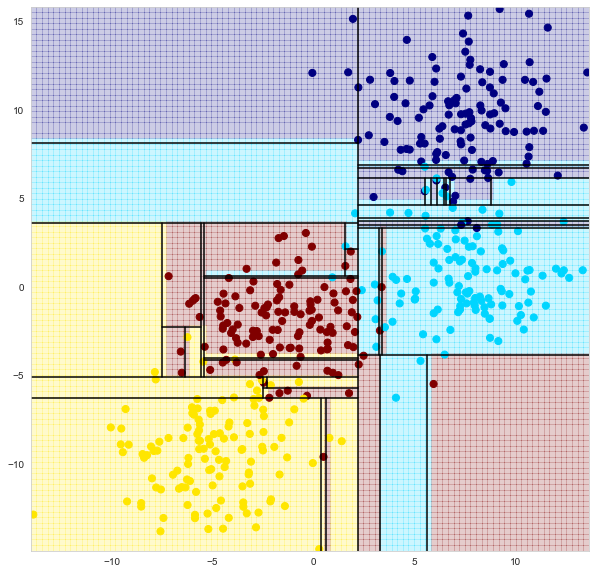

In [18]:
# Set model variable
clf = DecisionTreeClassifier(max_depth=10,random_state=0)

# Show Boundaries
visualize_tree(clf,x,y)# to prevent overfitting random forest classification is used

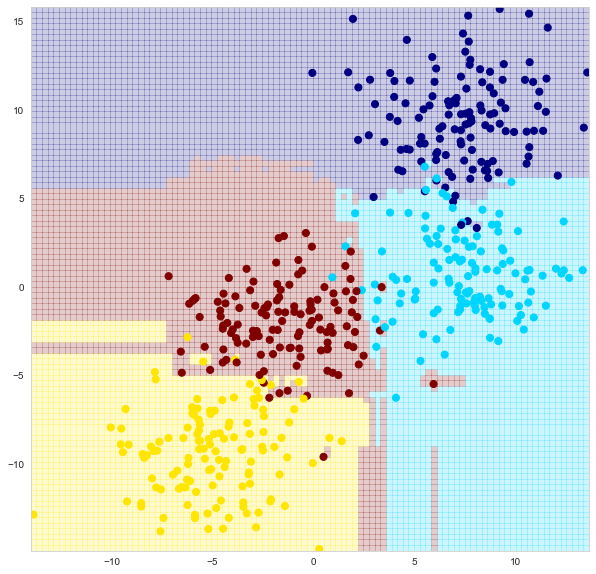

In [21]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0)# no of random tree=100 and it will sum up to give a decision 

# Get rid of boundaries to avoid error
visualize_tree(clf,x,y,boundaries=False)

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digit = load_digits()
import pandas as pd

In [2]:
x=pd.DataFrame(digit.data)

In [3]:
y=pd.DataFrame(digit.target)

In [4]:
x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [5]:
y

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=10)

In [7]:
len(x_test)

360

In [8]:
 r = RandomForestClassifier()

In [9]:
r.fit(x_train,y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
r.score(x_test,y_test)

0.9638888888888889

In [11]:
y_pred = r.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
acc=  accuracy_score(y_test,y_pred)

In [14]:
acc

0.9638888888888889

In [15]:
cm=confusion_matrix(y_test,y_pred)

In [16]:
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  2,  2,  1,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  0, 36]], dtype=int64)

In [17]:
import seaborn as sns

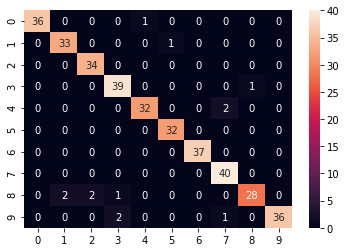

In [18]:
sns.heatmap(cm,annot=True)

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True,False], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10,100, 11, 12, 13, 15]}

In [20]:
 r = RandomForestClassifier()

In [21]:
g_search = GridSearchCV(estimator = r, param_grid = param_grid, 

                          cv = 2, n_jobs = 4, verbose = 2)

In [22]:
g_search.fit(x_train, y_train)



Fitting 2 folds for each of 132 candidates, totalling 264 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 264 out of 264 | elapsed:   10.7s finished
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [23]:
print(g_search.best_params_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


In [24]:
g_search.score(x_test,y_test)

0.9722222222222222

In [88]:
import pickle
saved_model = pickle.dumps(r)

In [89]:
random_from_pickle = pickle.loads(saved_model)

In [91]:
p=random_from_pickle.predict(x_test)

In [92]:
accuracy_score(y_test,p)

0.9666666666666667

In [25]:
 r = RandomForestClassifier(n_estimators=100,max_features='log2',bootstrap=False)

In [27]:
a=r.fit(x_train,y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [31]:
a.score(x_test,y_test)

0.9694444444444444